#### **Find global minima point of a function:**
In this exercise, you will implement the Newton-Raphson method to find the global minima point of the following function:

$$f(x) = e^{x+4} + x^\frac{2}{3} + 8\sin(x)$$

Local maxima / minima of a function occurs at the roots of the first derivative of the function. We can find the local minima point of a function by finding the roots of the first derivative of the function. So, we have to find the roots of the following function to get the local minima point of $f(x)$:
$$
\begin{align*}
f'(x) &= \frac{d}{dx} \left( e^{x+4} + x^\frac{2}{3} + 8\sin(x) \right) \\ \\
&= e^{x+4} + \frac{2}{3}x^{-\frac{1}{3}} + 8\cos(x) \\
\end{align*}
$$

Follow the steps below to find the local minima point of $f(x)$:

* Plot the graph for function $f{(x)}$

* Use the graph to determine the range of $x$ where the global minimum point for function $f(x)$ can be found.

* Choose 5 initial values of $x$ from the range where the global minimum point for function $f(x)$ can be found. For each initial value of $x$, use the Newton-Raphson method to find the global minimum point of $f(x)$. Use error tolerance, $\epsilon = 0.001$ and maximum number of iterations, $N = 100$. Consider the following steps to implement the Newton-Raphson method:

    * **Step 1:** Calculate the value of $f'(x)$ and $f''(x)$ for the given value of $x$.
    * **Step 2:** Calculate the value of $x_{new} = x_{old} - \frac{f'(x_{old})}{f''(x_{old})}$.
    * **Step 3:** Check if the absolute relative approximate error, $\epsilon_{abs} = \left| \frac{x_{new} - x_{old}}{x_{new}} \right|$ is less than the error tolerance, $\epsilon$. If yes, then stop the iteration and return the value of $x_{new}$. If no, then set $x_{old} = x_{new}$ and repeat the steps 1 and 2.
    * **Step 4:** If the number of iterations exceeds the maximum number of iterations, $N$, then stop the iteration and return the value of $x_{new}$. If no, then repeat the steps 1 to 3.

* For each stationary(minimum/maximum) point found in previous step, check if the point is a local minimum point by checking the value of $f''(x)$ at that point. If the value of $f''(x)$ is positive, then the point is a local minimum point.

* Now, as you have found the local minima point of $f(x)$, find the global minima point of $f(x)$ by finding the local minima point with the smallest value of $f(x)$.

* Find the value of the function $f(x)$ at the global minimum point found in previous step. The value should be close to $-4$. If the value is not close to $-4$, then repeat all the steps with different initial values of $x$.

* Finally, plot the graph for function $f(x)$, its first derivative $f'(x)$ along with the local and global minima points found in previous steps. Mark the global minima point with a red circle and the local minima points with a blue circle.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# plot the graph to determine global minima range

x = np.linspace(-50, 0.5, 100)
y = np.exp(x + 4) + (np.cbrt(x))**2 + 8*np.sin(x)


plt.plot(x, y, label='f(x)')


plt.xlabel('x')
plt.ylabel('y')
plt.title(r'Graph of $e^{x + 4} + x^{⅔} + 8sin(x)$')
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.8)
plt.axvline(0, color='black',linewidth=0.8)
plt.show()

In [ ]:
# declare functions and its derivatives

def f(x):
    return np.exp(x + 4) + (np.cbrt(x))**2 + 8*np.sin(x)

def f_prime(x):
    return np.exp(x + 4) + (2/3)*(np.cbrt(x)**-1) + 8*np.cos(x)


def f_doubleprime(x):
    return np.exp(x + 4) - (2/9)*(np.cbrt(x)**-4) - 8*np.sin(x)




In [ ]:
# declare 5 initial values and tolerance

x_initial = np.array([-4,-8, -10, -15, -2])

epsilon = 0.001

In [4]:
# Implementing Newton-Raphson function

def newton_raphson(x_old, eps):
    error_tolerance = 100
    N = 0
    last_x = None                   # end of interation value


    while (error_tolerance > eps) and (N != 100):

        x_new = x_old - f_prime(x_old)/f_doubleprime(x_old)

        error_tolerance = np.abs(x_new - x_old)/np.abs(x_new)

        # print("Current approximation: {:.4f} with error: {:.4f}".format(np.mean(x_new), error_tolerance))
        x_old = x_new
        N += 1
        #print(N)
        last_x = x_new

    return last_x



In [5]:
# Using the newton-Raphson to find global minima and local minimas

def global_minima(vals, eps):
    local_minimas = []

    # filter minima points and store
    for i in vals:
        if f_doubleprime(newton_raphson(i, eps)) > 0:
            minima = newton_raphson(i, eps)
            point = [minima, f(minima)]
            local_minimas.append(point)

    local_minimas = np.array(local_minimas)
    global_minima_index = np.argmin(local_minimas[:, 1])        # find index of smallest f(x)
    return local_minimas[global_minima_index], local_minimas

result, _ = global_minima(x_initial, epsilon)
print(f"Global Minima at x = {result[0]}, y = {result[1]}")




Global Minima at x = -7.814733682154858, y = -4.033791884402996


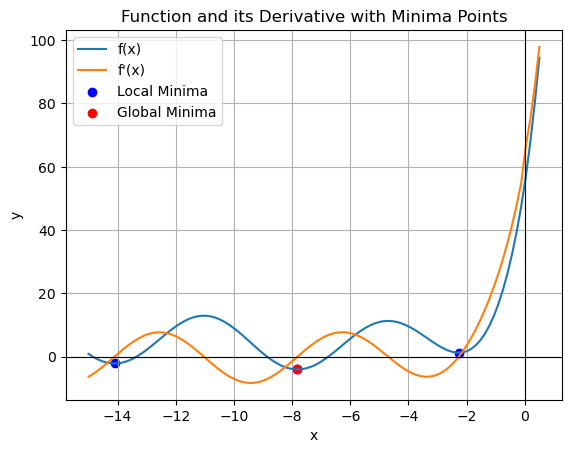

In [37]:
# Plotting the graph

x = np.linspace(min(x_initial), 0.5, 100)
y = f(x)
y_prime = f_prime(x)


global_minima_points, local_minima_points = global_minima(x_initial, epsilon)


plt.plot(x, y, label='f(x)')
plt.plot(x, y_prime, label="f'(x)")


plt.scatter(local_minima_points[:, 0], local_minima_points[:, 1], color='blue', marker='o', label='Local Minima')


plt.scatter(*global_minima_points, color='red', marker='o', label='Global Minima')

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Function and its Derivative with Minima Points')
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.8)
plt.axvline(0, color='black',linewidth=0.8)
plt.show()
